In [1]:
import pyvisa
import matplotlib as plt
import numpy as np 
import sys

In [2]:
def osc_cmd_builder(function, channel, values):
    channel = channel[0]+channel[-1]
    match function:
        case "ATTN":
            '''values = [attenuation_factor,]'''
            command_string = channel+":"+function+":"+str(values[0])
        case "OFST":
            '''values = [voltage_offset]'''
            command_string = channel+":"+function+" "+str(values[0])+"V"
        case "VDIV":
            '''values = [vertical_sensitivity]'''
            command_string = channel+":"+function+" "+str(values[0])+"V"
        case "TDIV":
            '''values = [horizontal_scale'''
            command_string = function+" "+str(values[0])+"S"
        case "HPOS":
            '''values = [horizontal_position]'''
            command_string = function+" "+str(values[0])+"S"
        case "TRMD":
            '''values = [trigger_mode]'''
            command_string = function+" "+values[0]
        case "TRSE":
            '''values = [trigger_type, hold_type, hold_value]'''
            command_string = function+" "+values[0]+",SR,"+channel+",HT,"+values[1]+",HV,"+str(values[2])+"S"
        case "TRLV":
            command_string = channel+":"+function+" "+str(values[0])+"V"
    return command_string


In [48]:
rm = pyvisa.ResourceManager()
osc = rm.open_resource("USB0::0xF4EC::0xEE38::SDSMMFCD4R9625::INSTR")




In [49]:
osc.write(osc_cmd_builder("ATTN", "Channel 1", [1]))
osc.write(osc_cmd_builder("OFST", "Channel 1", [0]))
osc.write(osc_cmd_builder("VDIV", "Channel 1", [0.15]))
osc.write(osc_cmd_builder("TDIV", "Channel 1", [5E-4]))
osc.write(osc_cmd_builder("HPOS", "Channel 1", [0]))

9

In [50]:
sample_rate = osc.query("SARA?")
time_inter = 1/float(sample_rate[0:-1])
osc.write("C1:WF? DAT2")
wf = osc.read_raw()
osc.close()

In [33]:
wf = wf[16:-2]

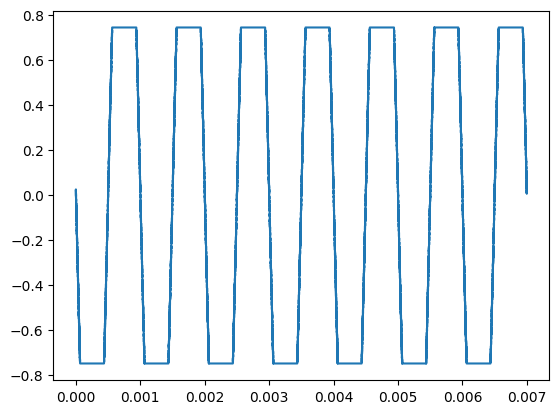

In [43]:
import matplotlib.pyplot as plt
hgrid = 14
offset = 0
vdiv = 0.15
tdiv = float('5E-4')

decimal = []
for i,byte in enumerate(wf):
    decimal.append(int.from_bytes(wf[i:i+1], byteorder=sys.byteorder))
data = np.array(decimal)
time = np.flip(np.array([(tdiv*hgrid)-(idx*time_inter) for idx in range(0,data.size) ]))
#print(data)


voltage_data = np.array([int(code)*(vdiv/25)-offset if int(code) < 127 else (int(code)-256)*(vdiv/25)-offset for code in data])

fig, ax = plt.subplots()
ax.plot(time, voltage_data)

plt.show()

In [7]:
data.size

7000018